In [138]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy.stats import norm, shapiro
import pylab
import pandas_profiling
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [139]:
mathematics = pd.read_csv('./data/student_mat.csv')
portuegese = pd.read_csv('./data/student_por.csv')

# <div align="center">Encoding binary data </div>

In [148]:
mat = mathematics.copy()
por = portuegese.copy()
mat['schoolsup'] = mat['schoolsup'].replace({'yes':1, 'no':0})
mat['famsup'] = mat['famsup'].replace({'yes':1, 'no':0})
mat['paid'] = mat['paid'].replace({'yes':1, 'no':0})
mat['activities'] = mat['activities'].replace({'yes':1, 'no':0})
mat['nursery'] = mat['nursery'].replace({'yes':1, 'no':0})
mat['higher'] = mat['higher'].replace({'yes':1, 'no':0})
mat['internet'] = mat['internet'].replace({'yes':1, 'no':0})
mat['romantic'] = mat['romantic'].replace({'yes':1, 'no':0})

# <div align="center">Data Cleaning</div>

## 1. Missing data

In [141]:
mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Data does not have missing values

In [142]:
for col in mat.columns:
    pct_missing = np.mean(mat[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 0.0%
famsize - 0.0%
Pstatus - 0.0%
Medu - 0.0%
Fedu - 0.0%
Mjob - 0.0%
Fjob - 0.0%
reason - 0.0%
guardian - 0.0%
traveltime - 0.0%
studytime - 0.0%
failures - 0.0%
schoolsup - 0.0%
famsup - 0.0%
paid - 0.0%
activities - 0.0%
nursery - 0.0%
higher - 0.0%
internet - 0.0%
romantic - 0.0%
famrel - 0.0%
freetime - 0.0%
goout - 0.0%
Dalc - 0.0%
Walc - 0.0%
health - 0.0%
absences - 0.0%
G1 - 0.0%
G2 - 0.0%
G3 - 0.0%


## 2. Irregular data (Outliers)

### No outliers in numerical data were found

In [143]:
df_numeric = mat.select_dtypes(include=[np.number])
for col in df_numeric.columns:
    print('\n' + col)
    print(df_numeric[col].describe())


age
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Medu
count    395.000000
mean       2.749367
std        1.094735
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Fedu
count    395.000000
mean       2.521519
std        1.088201
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

traveltime
count    395.000000
mean       1.448101
std        0.697505
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

studytime
count    395.000000
mean       2.035443
std        0.839240
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

failures
count

In [144]:
df_numeric = por.select_dtypes(include=[np.number])
for col in df_numeric.columns:
    print('\n' + col)
    print(df_numeric[col].describe())


age
count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Medu
count    649.000000
mean       2.514638
std        1.134552
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Fedu
count    649.000000
mean       2.306626
std        1.099931
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

traveltime
count    649.000000
mean       1.568567
std        0.748660
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

studytime
count    649.000000
mean       1.930663
std        0.829510
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

failures
count

### No outliers in categorical data were found

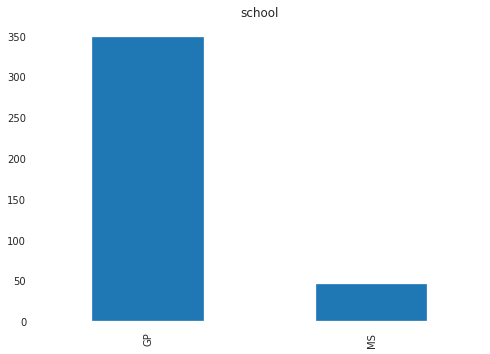

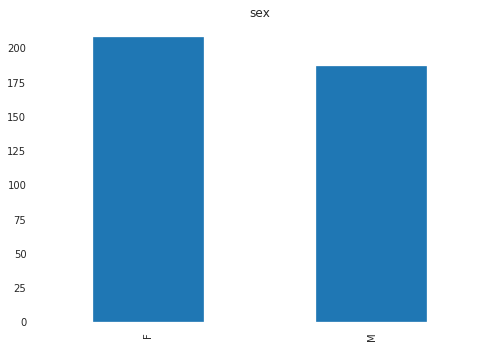

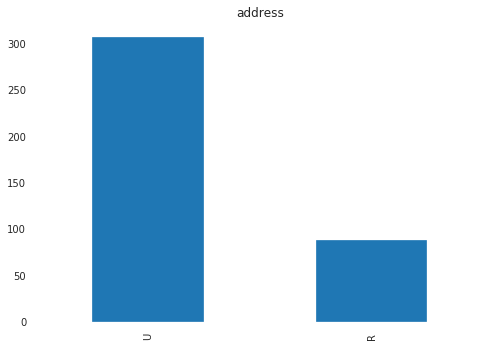

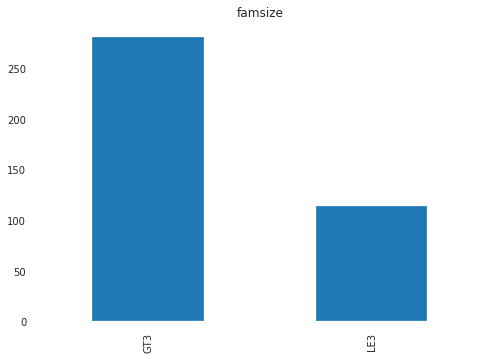

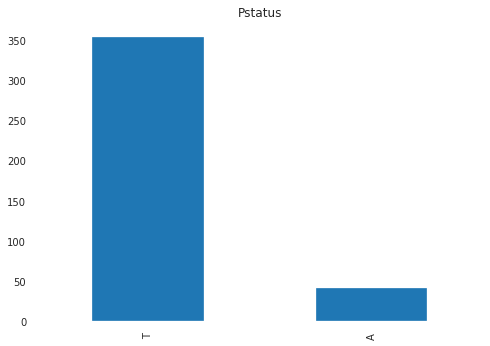

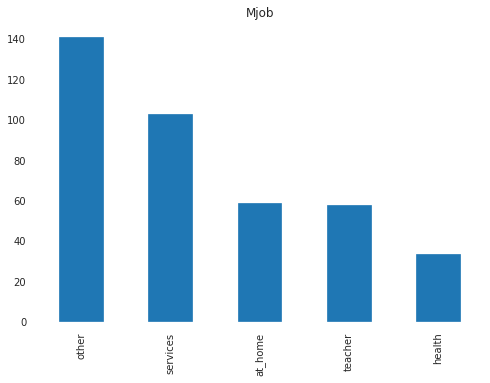

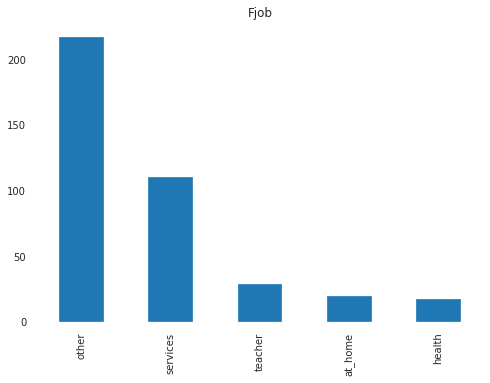

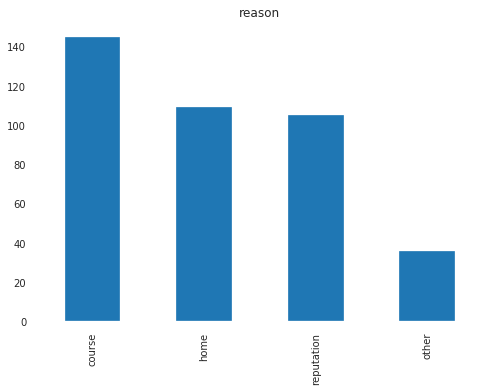

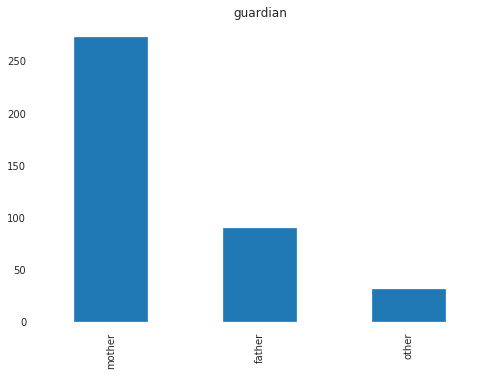

In [145]:
df_categorical = mat.select_dtypes(exclude=[np.number])
for col in df_categorical.columns:
    df_categorical[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

# <div align="center">Exploratory Data Analysis</div>

### What numerical values have the strongest relationship with grades? (mathematics)

**<ul> Strong positive correlation</ul>**
    <li>Planning to pursue a higher education</li>
    <li>Study time</li>
    <li>Mother and father education</li>
    <li>Internet access</li>
**</ul>**
**<ul> Strong negative correlation</ul>**
    <li>Previous failures</li>
    <li>Workday alcohol consumption</li>
    <li>Weekend alcohol consumption</li>
    <li>Travel time</li>
    <li>Free time</li>
    <li>Age</li>
**</ul>**
**<ul> Medium  negative correlation</ul>**
    <li>Health condition</li>
    <li>Absenses</li>
    <li>Romantic relationship</li>
**</ul>**

###  What numerical values have the strongest relationship with number of alcohol consumption? (mathematics)

**<ul> Strong positive correlation</ul>**
    <li>Going out</li>
    <li>Absenses</li>
    <li>Freetime</li>
    <li>Health condition</li>
**</ul>**
**<ul> Strong negative correlation</ul>**
    <li>Study time</li>
    <li>Grades</li>
    <li>Extra educational support</li>
    <li>Family relationship</li>
**</ul>**

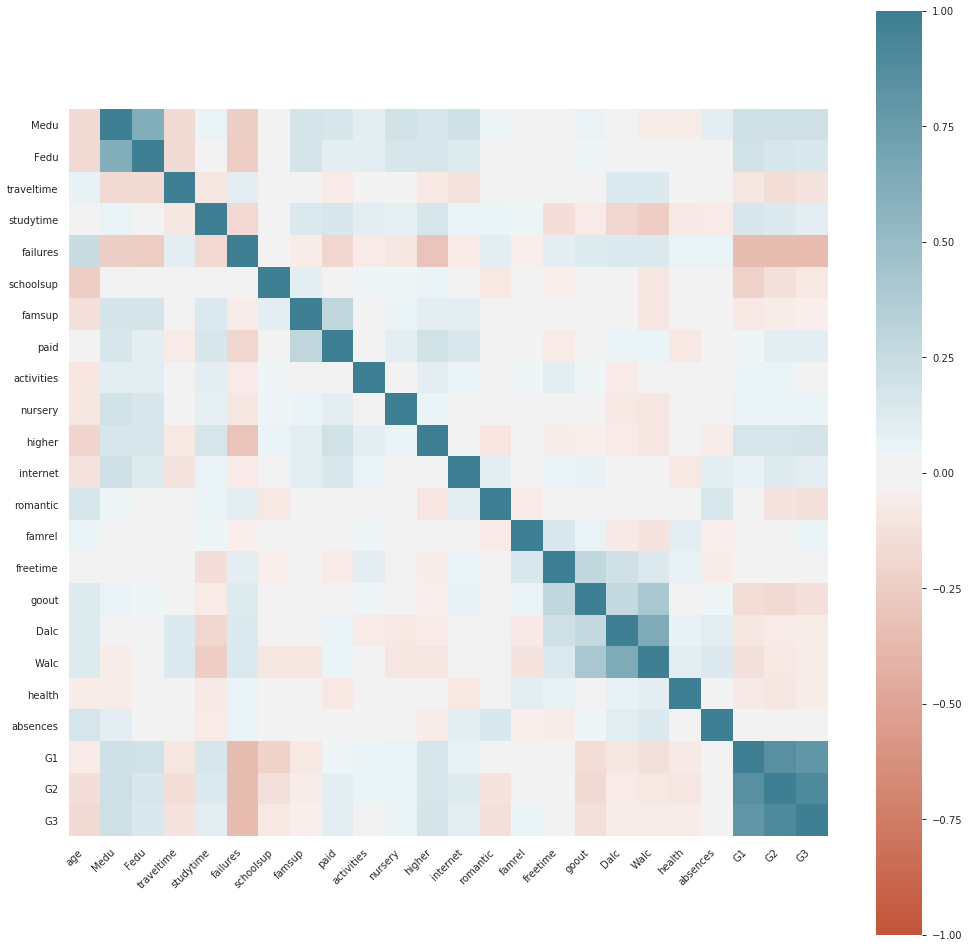

In [146]:
corr = mat.corr()
fig, ax = plt.subplots(figsize=(17,17)) 
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

In [147]:
X = mat.select_dtypes(include=[np.number]).iloc[:, 0:-3]
y = mat.iloc[:,-1]    
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))  

        Specs       Score
20   absences  648.166848
5    failures  140.934898
18       Walc   28.444167
6   schoolsup   28.319018
13   romantic   20.089526
17       Dalc   17.082868
8        paid   16.129900
1        Medu   13.894852
16      goout   10.472494
2        Fedu   10.375563
